# What ML/DL frameworks are people using and what is their growth?

- The most frequent framework import is sklearn. Much less frequently imported are tensorflow and keras. Theano, mxnet, caffe, cntk, and pytorch are used extremely rarely.
- Over time, Sklearn has consistently been in the lead, though it did have a small dip in popularity in 2014 and 2015. Conversely, the popularity of tensorflow grew during these years (though never to the level of Sklearn). Popularities have stayed stable since 2016, with sklearn being used in approximately 22% of notebooks, and both tensorflow and keras used in 6-7% of notebooks. Theano and mxnet hover around 1%. Caffee, cntk, and pytorch are very close to 0%.
- While Sklearn is the most frequent framework in Jupyter Notebooks, Tensorflow is the most frequent across all of GitHub.
- Theano and Keras tend to be imported into the same notebooks, though both are very infrequent.
- Model selection and Metrics are the most frequently imported modules from scikit learn. Model selection is most frequently used for train test split, cross validation score, and grid search with cross validation. Metrics is frequently used for accuracy score, confusion matrix, classification report, mse, f1, and area under the roc curve.
- The most frequent imports from Keras are 'Models' and 'Layers'. Further, 'Sequential' is by far the most frequent import from keras.models and 'Dense' is the most frequent import from keras.layers.
--------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats

In [2]:
import load_data
notebooks, cells, owners, readmes, repos = load_data.load(lang = 'python')

In [3]:
DATE_CHOICE = 'pushed_at'

# Framework Popularities

In [4]:
frameworks = ['tensorflow', 'sklearn', 
              'keras', 'theano', 'mxnet', 
              'caffe', 'pytorch', 'cntk']

In [5]:
def agg_imports(list_of_lists):
    overall = []
    for li in list_of_lists:
        for l in li:
            if len(l) != 0:
                overall.append(l[0].split('.')[0])
    return list(set(overall))

nb_imports = cells.groupby('file')['imports'].aggregate(agg_imports).reset_index()

In [6]:
all_imports = []
for im in nb_imports.imports:
    all_imports += im

In [7]:
framework_imports = pd.Series(all_imports)[pd.Series(all_imports).isin(frameworks)]
framework_counts = framework_imports.value_counts().reset_index().rename(columns={'index':'Framework',0:'count'})

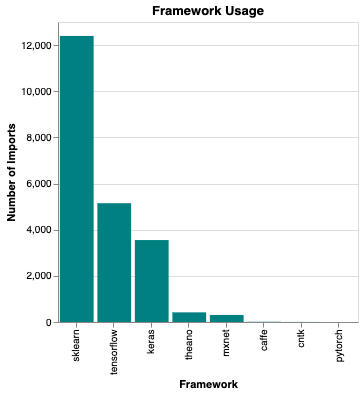

In [8]:
alt.Chart(framework_counts, width = 300, height = 300, title = 'Framework Usage').mark_bar(color = 'teal').encode(
    alt.X('Framework',
         sort = alt.EncodingSortField(field="count", op="sum",order="descending"),
    ),
    alt.Y('count', title = 'Number of Imports')
)

The most frequent framework import is sklearn. Much less frequently imported are tensorflow and keras. Theano, mxnet, caffe, cntk, and pytorch are used extremely rarely. Lets take a closer look at these packages' growths in popularity over time.

# Is this everywhere, or just in Jupyter

On GitHub, a code search for 'keras' has 1,796,655 results, 'sklearn' has 3,530,545, and 'tensorflow' has 10,430,463.

For a code search with the 'Jupyter Notebook' language specification, 'keras' has 304,029  results, 'sklearn' has 982,596, and 'tensorflow' has 524,929.

Even though tensorflow is by far the most popular across all code files on github (surpasses sklearn by a factor of ~3), it is much less popular within jupyter notebooks (sklearn is almost twice as popular).

&ast; Numbers collected from github search on Friday July 5th at 12:46pm

## Chi Squared Test for Goodness of Fit
- $H_o$: proportions of use of machine learning frameworks are the same within machine learning Jupyter notebooks on github and for all machine learning code on github.
- $H_a$: proportions of use of machine learning frameworks are different for machine learning Jupyter notebooks on github than they are for all machine learning code on github.

\* *machine learning* code / notebooks means files that reference *at least one* of the machine learning frameworks considered (keras, sklearn, or tensorflow)

In [9]:
keras = 1796655
sklearn = 3530545
tensorflow = 10430463
total = keras + sklearn + tensorflow

keras_j = 304029
sklearn_j = 982596
tensorflow_j = 524929
total_j = keras_j + sklearn_j + tensorflow_j

expected = {
    'keras': total_j * keras / total,
    'sklearn': total_j * sklearn / total,
    'tensorflow': total_j * tensorflow / total
}

observed = {
    'keras': keras_j,
    'sklearn': sklearn_j,
    'tensorflow': tensorflow_j
}

chi_2_parts = [(observed[f] - expected[f])**2 / expected[f] 
             for f in expected
        ]

chi_2 = sum(chi_2_parts)

df = len(expected) - 1

p_val = scipy.stats.chi2.pdf(chi_2, df)

print("""At the 5% significance level, with a chi-squared statistic of 
{0} and a p-value of {1}, we {2}""".format(
    round(chi_2,2), 
    round(p_val,2),
    ("reject the null hypotheis and conclude that proportions of machine learning frameworks are different for Jupyter notebooks on github than they are for all code on github." 
     if p_val < 0.05 else 
     "fail to reject the null hypothesis.")
))

At the 5% significance level, with a chi-squared statistic of 
1244502.63 and a p-value of 0.0, we reject the null hypotheis and conclude that proportions of machine learning frameworks are different for Jupyter notebooks on github than they are for all code on github.


In [10]:
chi_2_parts_cp = chi_2_parts.copy()
chi_2_parts_cp.sort()
first = list(expected.keys())[chi_2_parts.index(chi_2_parts_cp[2])]
second = list(expected.keys())[chi_2_parts.index(chi_2_parts_cp[1])]
third = list(expected.keys())[chi_2_parts.index(chi_2_parts_cp[0])]

print("{0} contributes the most to the chi squared value, followed by {1} and then {2}.".format(first.title(), second.title(), third.title()))

Sklearn contributes the most to the chi squared value, followed by Tensorflow and then Keras.


## Why?
Some possible reasons why SciKitLearn rules over Jupyter while Tensorflow is usually in the lead.
- Intro courses teach SciKitLearn: [this article](https://towardsdatascience.com/beginners-guide-to-machine-learning-with-python-b9ff35bc9c51), [this introduction](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/), [this udacity class](https://www.udacity.com/course/intro-to-machine-learning--ud120), [this ibm corsea class](https://www.coursera.org/learn/machine-learning-with-python), [this university of michigan corsea class](https://www.coursera.org/learn/python-machine-learning)

# Use of frameworks over time

In [11]:
imports_by_year = nb_imports.merge(notebooks, on = 'file').merge(repos, on = 'repo_id')[['imports','file',DATE_CHOICE]]
imports_by_year[DATE_CHOICE] = pd.to_datetime(imports_by_year[DATE_CHOICE])
imports_by_year['year'] = [c.year for c in imports_by_year[DATE_CHOICE]]
imports_by_year['month'] = [c.month for c in imports_by_year[DATE_CHOICE]]

In [12]:
for column in frameworks:
    imports_by_year[column] = [0]*len(imports_by_year)
    imports_by_year.loc[[column in ' '.join(im) for im in imports_by_year['imports']],column] = 1
yearly_counts = imports_by_year.groupby(['year'])[frameworks].sum().reset_index()
yearly_counts['total'] = imports_by_year.groupby('year')[DATE_CHOICE].count().values
yearly_counts_long = pd.melt(yearly_counts, id_vars =['year'], value_vars =frameworks) 

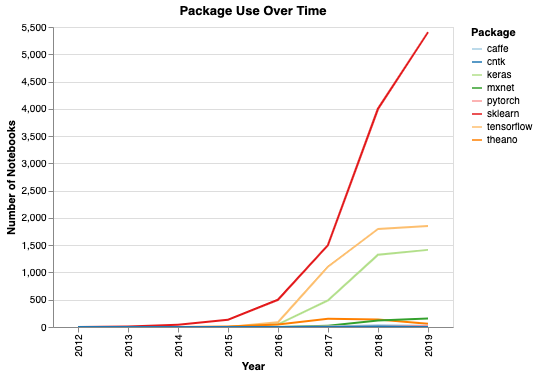

In [13]:
alt.Chart(yearly_counts_long, width=400, title = 'Package Use Over Time').mark_line().encode(
    alt.X('year:O', title='Year'),
    alt.Y('value', title='Number of Notebooks'),
    alt.Color('variable', scale=alt.Scale(scheme='paired'), title = 'Package')
)

Sklearn is consistently in the lead. Tensorflow and keras stay close together. The rest are very unpopular. Let's look at the proportion of notebooks each year that these packages are used in for a better idea of relative popularity over time.

In [14]:
yearly_props = pd.DataFrame({'year':yearly_counts['year']})
for column in frameworks:
    yearly_props[column] = yearly_counts[column] / yearly_counts['total']
    
yearly_props_long = pd.melt(yearly_props, id_vars =['year'], value_vars = frameworks) 

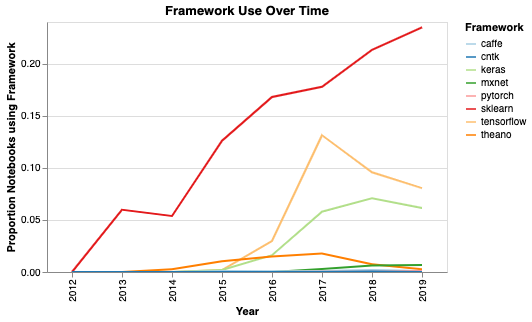

In [15]:
alt.Chart(yearly_props_long, width = 400, height = 250, title = 'Framework Use Over Time').mark_line(strokeWidth = 2).encode(
    alt.X('year:O', title='Year'),
    alt.Y('value', title='Proportion Notebooks using Framework'),
    alt.Color('variable:N', scale=alt.Scale(scheme='paired'), title = 'Framework')
)

Scikitlearn has grown steadily in popularity since 2012, now with over 20% of all notebooks on GitHub using it. Tensorflow and Keras peaked in popularity in 2017, with around 10% of notebooks using it, but since have decreased slightly in popularity. Theano and Mxnet are not very popular. Caffee, cntk, and pytorch are very close to 0%.

# What frameworks are frequently used together -- in a notebook?

In [16]:
for f in frameworks:
    notebooks[f] = [f in ' '.join(im) for im in nb_imports.imports]

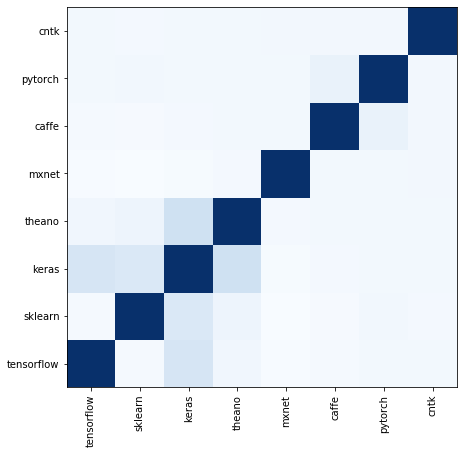

In [17]:
df = notebooks[frameworks].corr().transpose()
fig = plt.figure(figsize = (7,7))
plt.pcolor(df, cmap = 'Blues')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation = 90)
plt.show()

In [18]:
t = len(notebooks[notebooks['theano'] == True])
k = len(notebooks[notebooks['keras'] == True])
tk = len(notebooks[np.logical_and(notebooks['theano'] == True, notebooks['keras'] == True)])
print("There are only {0} notebooks that use theano and only {1} that use keras. {2} notebooks use both.".format(t,k,tk))

There are only 418 notebooks that use theano and only 3552 that use keras. 238 notebooks use both.


It looks like people usually use one framework or the other and rarely import both into the same notebook. The most likely to be imported together are theano and keras. Of the 169 notebooks that use theano, 123 (72.78%) also use keras. 

# What frameworks are frequently used together -- by the same user?
The correlations for framework use by user look almost exactly the same as by notebook. It is possible that with more data, this will change. 

In [19]:
def atleast_once(nums):
    if sum(nums) > 0:
        return 1
    else:
        return 0
    
frameworks_user_counts = notebooks.groupby('owner_id')[frameworks].aggregate(atleast_once).reset_index()

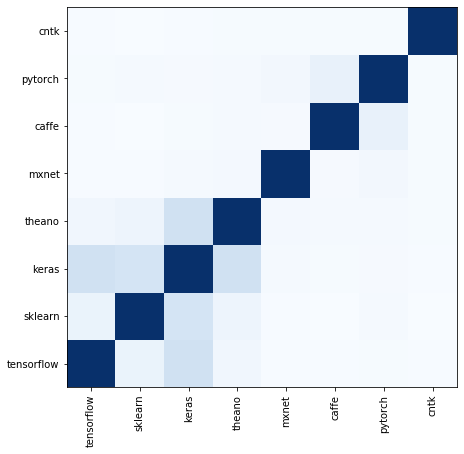

In [20]:
df = frameworks_user_counts[frameworks].corr().transpose()
fig = plt.figure(figsize = (7,7))
plt.pcolor(df, cmap = 'Blues')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation = 90)
plt.show()

In [21]:
t = len(frameworks_user_counts[frameworks_user_counts['theano'] == True])
k = len(frameworks_user_counts[frameworks_user_counts['keras'] == True])
tk = len(frameworks_user_counts[np.logical_and(frameworks_user_counts['theano'] == True, frameworks_user_counts['keras'] == True)])
print("There are only {0} users that use theano and only {1} that use keras. {2} users use both.".format(t,k,tk))

There are only 406 users that use theano and only 3311 that use keras. 250 users use both.


# Closer look at sklearn
Scikit Learn is the most popular machine learning framework imported into jupyter notebooks. Here, we look more specifically at what people are using sklearn for, and how those uses have changed over time.

In [22]:
cells['sklearn'] = [sum([sum([c[0].startswith('sklearn') if c!= [] else False]) 
                         for c in cell])>0 
                    for cell in cells.imports]

In [23]:
sk_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('sklearn')]
                ) for import_list in cells[cells['sklearn']==True]['imports']])

In [24]:
sk_mods = pd.Series([m for m in sk_modules if m.startswith('sklearn.')])
sk_major_mods = pd.Series([m.split('.')[1] for m in sk_mods]).value_counts()
sk_all_mods = pd.Series([m.split('.')[1:] for m in sk_mods]).value_counts()

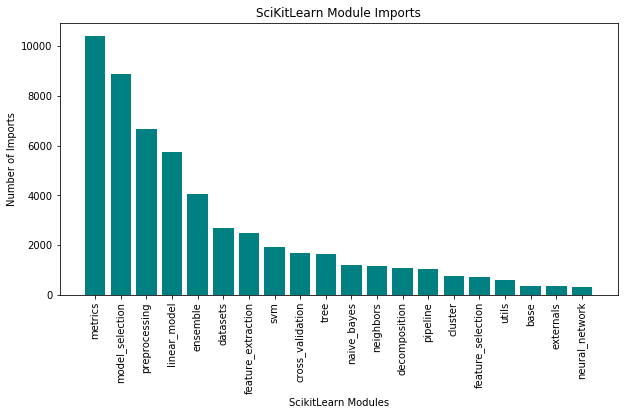

In [25]:
labels = sk_major_mods.index[:20]
pos = np.arange(len(labels))
height = sk_major_mods.values[:20]
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn Module Imports')
plt.xlabel('ScikitLearn Modules')
plt.ylabel('Number of Imports')
plt.show()

Model selection and Metrics are the most frequently imported modules from scikit learn.

## Sklearn.Metrics


In [26]:
metrics_modules = sk_mods[[
    m.startswith('sklearn.metrics.') for m in sk_mods
]]
metrics_modules = ['.'.join(m.split('.')[2:]) for m in metrics_modules]
metrics_uses = pd.Series(metrics_modules).value_counts()

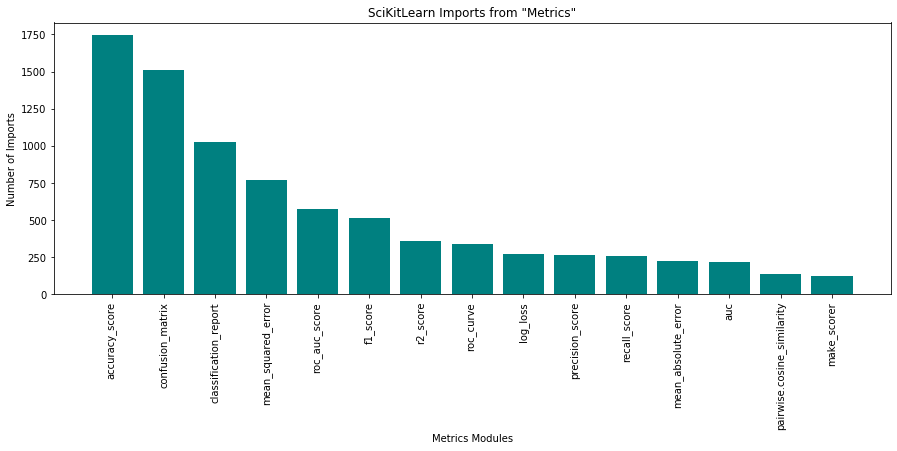

In [27]:
labels = metrics_uses[:15].index
pos = np.arange(len(labels))
height = metrics_uses[:15].values
fig = plt.figure(figsize=(15,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn Imports from "Metrics"')
plt.xlabel('Metrics Modules')
plt.ylabel('Number of Imports')
plt.show()

Accuracy score, confusion matrix, classification report, mse, f1, and area under the roc curve are the most commonly used metrics from skelarn.

## Sklearn.model_selection

In [28]:
model_selection_modules = sk_mods[[m.startswith('sklearn.model_selection.') for m in sk_mods]]
model_selection_modules = ['.'.join(m.split('.')[2:]) for m in model_selection_modules]
uses = pd.Series(model_selection_modules).value_counts()

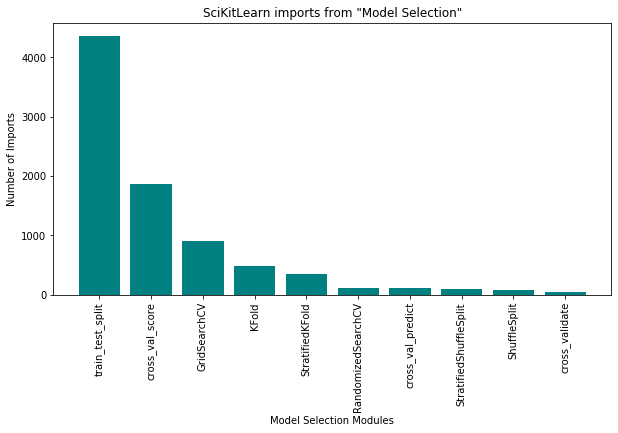

In [29]:
labels = uses.index[:10]
pos = np.arange(len(labels))
height = uses.values[:10]
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn imports from "Model Selection"')
plt.xlabel('Model Selection Modules')
plt.ylabel('Number of Imports')
plt.show()

People almost alwasy use train test split from the model selection package of sklearn. The next most popular uses of model selection are cross validation score and grid search with cross validation.

# Closer look at Keras
Keras is for deep learning with neural networks. With keras, 'Sequential', from keras.models, is the holder for the models (model = Sequential()). The layers, from keras.layers, are then added with model.add--for example, model.add(Dense(...)). Dense is an example of a fully-connected layer, so multiple 'Dense' additions create a multilyaer perceptron. A convolutional nueral net can be created by adding Conv2D. Add LSTM for an artifical recurrent neural net. It may not be useful to look into what specific 'models' are used, since all models are some version of a neural net. The way that models are built with keras explains why the most frequent imports are 'Models' and 'Layers'. Further, it explains why 'Sequential' is by far the most frequent import from keras.models.

--------------------

In [30]:
cells['keras'] = [sum([sum([c[0].startswith('keras') if c!= [] else False]) 
                         for c in cell])>0 
                    for cell in cells.imports]

In [31]:
keras_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('keras')]
                ) for import_list in cells[cells['keras']==True]['imports']])
keras_major_mods = ['' if '.' not in m else m.split('.')[1] for m in keras_modules]
keras_major_mods_counts = pd.Series(keras_major_mods).value_counts()

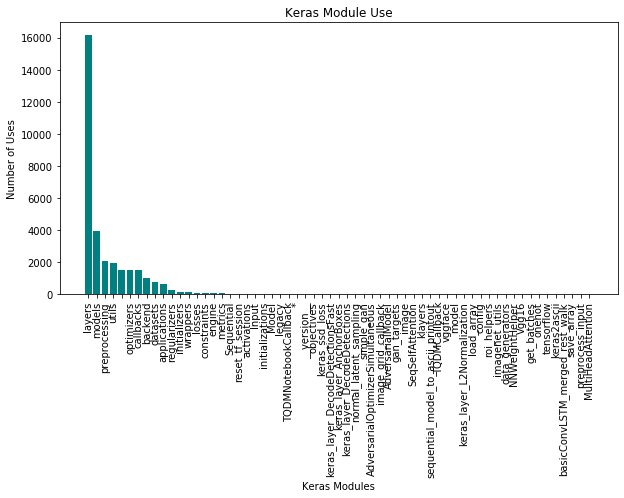

In [32]:
labels = keras_major_mods_counts.index
pos = np.arange(len(labels))
height = keras_major_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras Modules')
plt.ylabel('Number of Uses')
plt.title('Keras Module Use')
plt.show()

## Keras.Layers

In [33]:
keras_layers_minor_mods = [mod.split('.')[1]
    for mod in ['' if '.' not in m else '.'.join(m.split('.')[1:]) for m in keras_modules]
    if mod.startswith('layers.')
]
keras_layers_minor_mods_counts = pd.Series(keras_layers_minor_mods).value_counts()[:20]

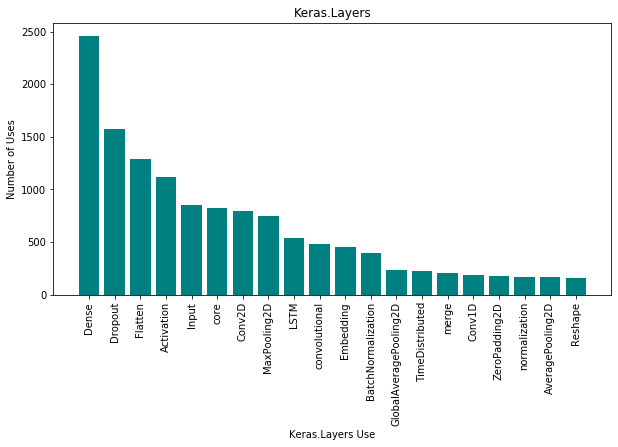

In [34]:
labels = keras_layers_minor_mods_counts.index
pos = np.arange(len(labels))
height = keras_layers_minor_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras.Layers Use')
plt.ylabel('Number of Uses')
plt.title('Keras.Layers')
plt.show()

## Keras.Models

In [35]:
keras_models_minor_mods = [mod.split('.')[1]
    for mod in ['' if '.' not in m else '.'.join(m.split('.')[1:]) for m in keras_modules]
    if mod.startswith('models.')
]
keras_models_minor_mods_counts = pd.Series(keras_models_minor_mods).value_counts()[:20]

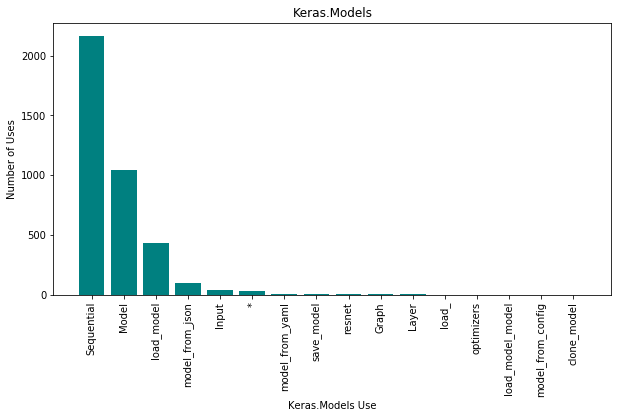

In [36]:
labels = keras_models_minor_mods_counts.index
pos = np.arange(len(labels))
height = keras_models_minor_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras.Models Use')
plt.ylabel('Number of Uses')
plt.title('Keras.Models')
plt.show()

# Closer look at Tensorflow

In [37]:
cells['tensorflow'] = [sum([sum([c[0].startswith('tensorflow') if c!= [] else False]) 
                         for c in cell])>0 
                    for cell in cells.imports]

In [38]:
tf_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('tensorflow')]
                ) for import_list in cells[cells['tensorflow']==True]['imports']])
tf_major_mods = ['' if '.' not in m else m.split('.')[1] for m in tf_modules]
tf_major_mods_counts = pd.Series(tf_major_mods).value_counts()

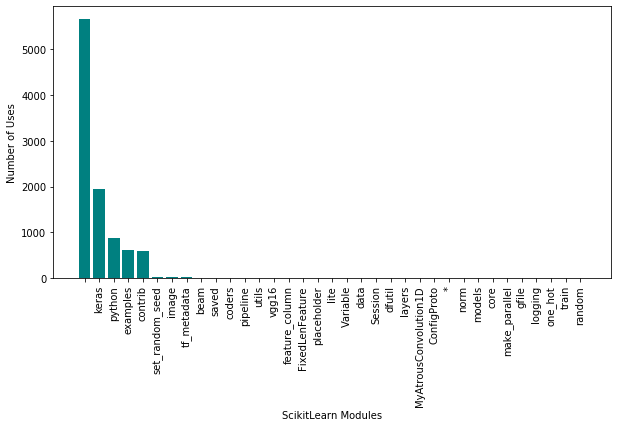

In [39]:
labels = tf_major_mods_counts.index
pos = np.arange(len(labels))
height = tf_major_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('ScikitLearn Modules')
plt.ylabel('Number of Uses')
plt.show()

<center> <a href = 2_Languages.ipynb>Language Use &lt;</a> | <a href = 4_Packages.ipynb>&gt; Python Package Use</a> <center>